In [1]:
import pandas as pd
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt

data = pd.read_csv("reviews.csv", parse_dates = ["Timestamp"])
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


### 1. Rating average / count by day

### Aggregation, groupby() & datetime method

In [2]:
#pandas groupby() method produces a new DataFrame

#grouping data by "Timestamp"
# day_average = data.groupby(["Timestamp"]) #grouping data by "Timestamp"
# day_average.head() 

#groupby() finds identical data to aggregate it, our data is not identical as the hours and minutes are different
#so, we need to make "Day" column which is identical to "Timestamp" but has aggregated data
data["Day"] = data["Timestamp"].dt.date
# data.head()

day_average = data.groupby(["Day"]).mean() #.mean() is the aggregation method. 
#the above code only returns the Rating column because it is the only column with numbers and python is smart
day_average #"Day" is not a column, it is an index. Rating is the only column

,Rating
Day,
2018-01-01,4.532609
2018-01-02,4.122807
2018-01-03,4.360465
2018-01-04,4.531250
2018-01-05,4.423077
...,...
2021-03-29,4.240000
2021-03-30,4.428571
2021-03-31,4.453125


### 2. Plotting

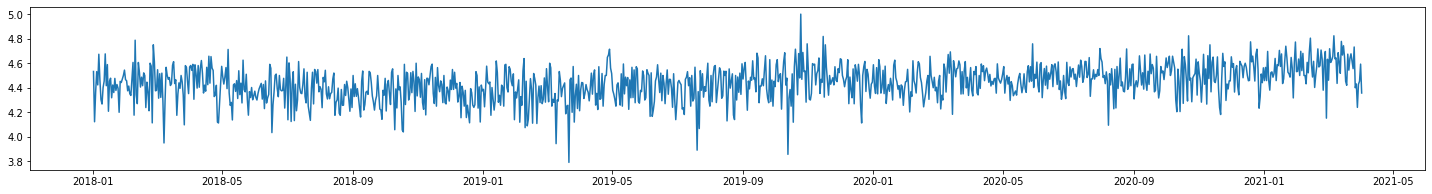

In [3]:
#import matplotlib

#adding features to plt plot
plt.figure(figsize=(25, 3)) #(width, height) of the plot

#plotting 
plt.plot(day_average.index, day_average["Rating"]) #takes 2 arguments, x and y axis. ("Day", "Rating")

### Downsampling & plotting Average Rating by Week

In [4]:
data["Week"] = data["Timestamp"].dt.strftime("%Y-%U") #string from time ("year-week")
#pandas is aggregating weeks of 2018, 2019, 2020 into 1. Week 1 of 2018 is aggregated with 2019 and 2020.
#it counts week1 of 2018, 19, 20 as one.
week_average = data.groupby(["Week"]).mean()
week_average

,Rating
Week,
2018-00,4.434564
2018-01,4.424933
2018-02,4.417702
2018-03,4.401024
2018-04,4.468085
...,...
2021-09,4.560096
2021-10,4.627315
2021-11,4.629121


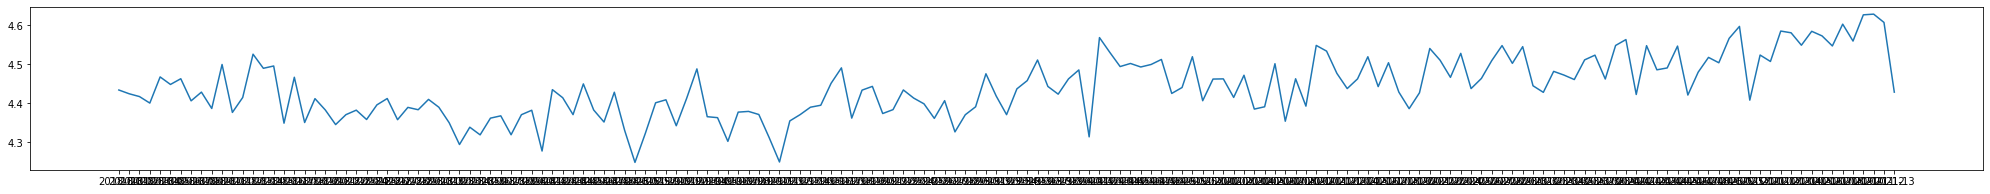

In [5]:
#plotting

plt.figure(figsize=(35, 3))

plt.plot(week_average.index, week_average["Rating"])

### Average rating by month

In [6]:
data["Month"] = data["Timestamp"].dt.strftime("%Y-%m") #string from time ("year-month")
# data.head()
month_average = data.groupby(["Month"]).mean()
month_average.describe()
#data

,Rating
count,40.000000
mean,4.443147
std,0.065807
min,4.333145
25%,4.395611
50%,4.437931
75%,4.483076
max,4.589207


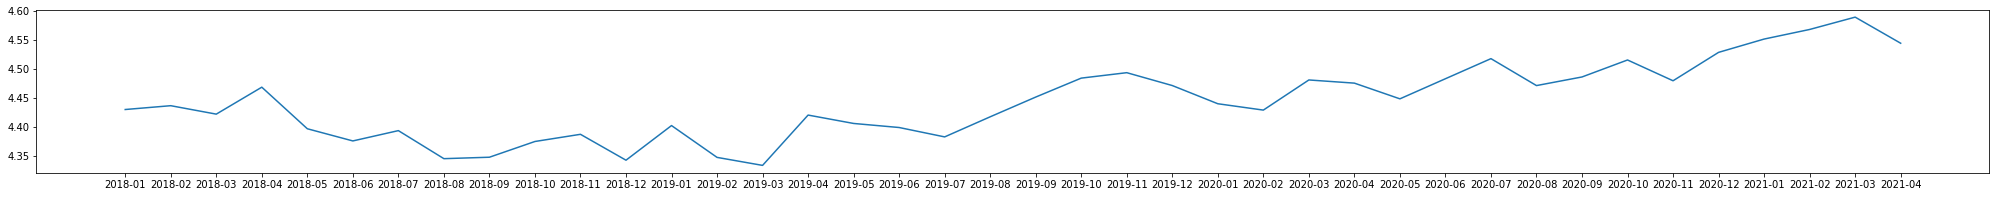

In [7]:
#plotting

plt.figure(figsize=(35, 3))

plt.plot(month_average.index, month_average["Rating"])

### Average rating by month by course name

In [8]:
#purpose is to plot multiple lines in a single graph

data["Month"] = data["Timestamp"].dt.strftime("%Y-%m") #string from time ("year-month")

month_average_course = data.groupby(["Month", "Course Name"]).mean() #gave 2 arguments to groupby

#unstacking the above line for better data structure by course name
month_average_course = data.groupby(["Month", "Course Name"]).mean().unstack()

month_average_course #it has 2 indexes (Month & Course Name) and 1 column (Rating)

Rating  \
Course Name 100 Python Exercises I: Evaluate and Improve Your Skills   
Month                                                                  
2018-01                                               4.353448         
2018-02                                               4.250000         
2018-03                                               4.500000         
2018-04                                               4.431034         
2018-05                                               4.358696         
2018-06                                               4.268293         
2018-07                                               4.589286         
2018-08                                               4.353659         
2018-09                                               4.238636         
2018-10                                               4.106061         
2018-11                                               4.212766         
2018-12                                               4.405172         
2019-01                                               4.048780         
2019-02                                               4.333333         
2019-03                                               4.269231         
2019-04                                               4.365854         
2019-05                                               4.486111         
2019-06                                               4.442308         
2019-07                                               4.414634         
2019-08                                               4.222222         
2019-09                                               4.531250         
2019-10                                               4.287500         
2019-11                                               4.512195         
2019-12                                               4.152778         
2020-01                                               4.277778         
2020-02                                               4.200000         
2020-03                                               4.240000         
2020-04                                               4.329268         
2020-05                                               4.340909         
2020-06                                               4.397059         
2020-07                                               4.250000         
2020-08                                               4.121622         
2020-09                                               4.307692         
2020-10                                               4.366667         
2020-11                                               4.461538         
2020-12                                               4.294118         
2021-01                                               4.283333         
2021-02                                               4.450000         
2021-03                                               4.190476         
2021-04                                               4.500000         

                                                                       \
Course Name 100 Python Exercises II: Evaluate and Improve Your Skills   
Month                                                                   
2018-01                                                    NaN          
2018-02                                                    NaN          
2018-03                                                    NaN          
2018-04                                                    NaN          
2018-05                                                    NaN          
2018-06                                                    NaN          
2018-07                                                    NaN          
2018-08                                                    NaN          
2018-09                                                    NaN          
2018-10                                                    NaN          
2018-11         

<AxesSubplot:xlabel='Month'>

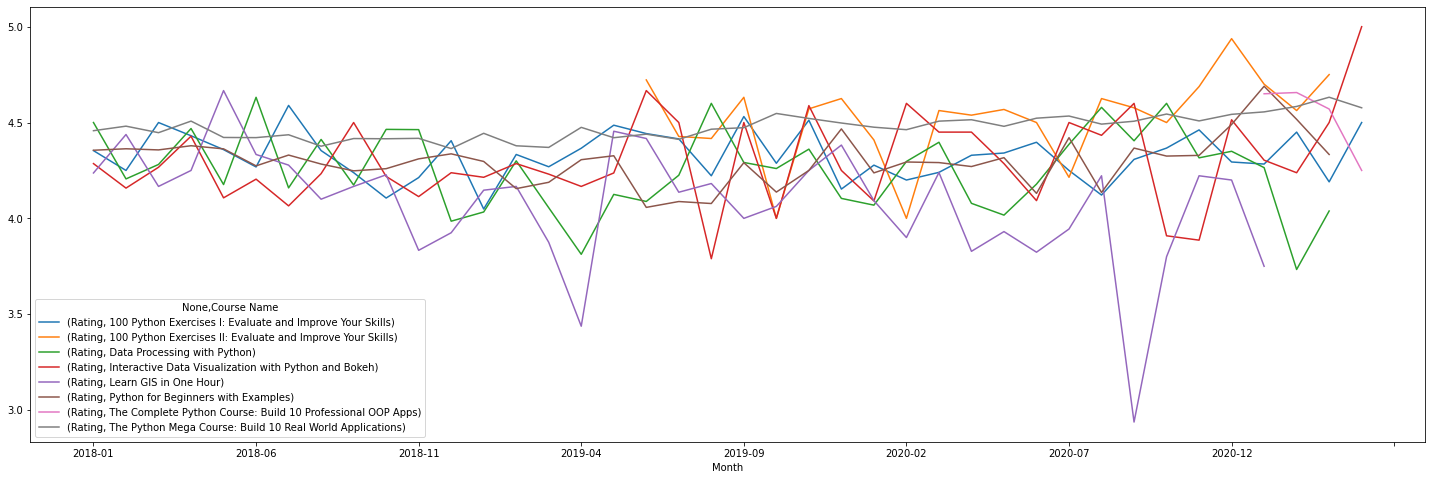

In [9]:
#plotting

month_average_course.plot(figsize = (25, 8))

### What day are people the happiest?

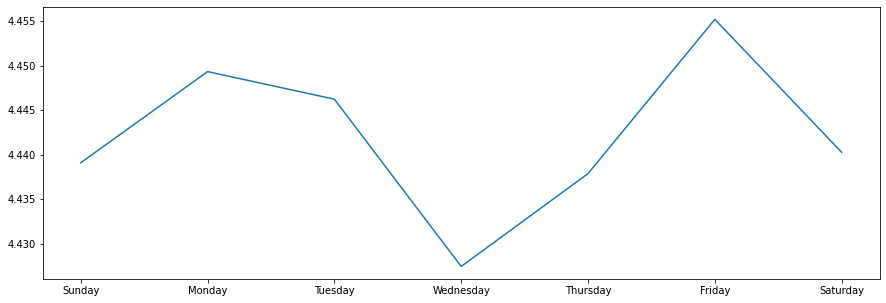

In [10]:
data["Weekday"] = data["Timestamp"].dt.strftime("%A") #%A for weekdays

#to bring the weekdays in ascending order, we need to give numbers to days using "%w" 
data["Daynumber"] = data["Timestamp"].dt.strftime("%w") #gives new "Daynumber" column 

#aggregating by weekday

weekday_average = data.groupby(["Weekday", "Daynumber"]).mean()
weekday_average = weekday_average.sort_values("Daynumber") #sorting in ascending order
weekday_average

#plotting by showing Weekday on x axis
x_axis = weekday_average.index.get_level_values(0) #index 0 is "Weekday". do weekday_average.index to see

plt.figure(figsize = (15, 5)) #filtering the figure to show better
plt.plot(x_axis, weekday_average["Rating"])

### Making a PIE chart

In [11]:
course_ratings = data.groupby(["Course Name"])["Rating"].count()
course_ratings

Course Name
100 Python Exercises I: Evaluate and Improve Your Skills       1593
100 Python Exercises II: Evaluate and Improve Your Skills       280
Data Processing with Python                                     868
Interactive Data Visualization with Python and Bokeh            767
Learn GIS in One Hour                                           499
Python for Beginners with Examples                             4821
The Complete Python Course: Build 10 Professional OOP Apps      470
The Python Mega Course: Build 10 Real World Applications      35702
Name: Rating, dtype: int64

([<matplotlib.patches.Wedge at 0x7fb8a39dc310>,
 [Text(1.0932045021416132, 0.12208159770132226, '100 Python Exercises I: Evaluate and Improve Your Skills'),
  Text(1.0679539537181753, 0.26357987923534204, '100 Python Exercises II: Evaluate and Improve Your Skills'),
  Text(1.0434237552357248, 0.34823392570193146, 'Data Processing with Python'),
  Text(0.9969710234481678, 0.46481047579063145, 'Interactive Data Visualization with Python and Bokeh'),
  Text(0.9520514707070057, 0.5509972750609823, 'Learn GIS in One Hour'),
  Text(0.6871674297354248, 0.858953388438983, 'Python for Beginners with Examples'),
  Text(0.3307031314068022, 1.0491117380325774, 'The Complete Python Course: Build 10 Professional OOP Apps'),
  Text(-0.8762757995015485, -0.6649366309716455, 'The Python Mega Course: Build 10 Real World Applications')])

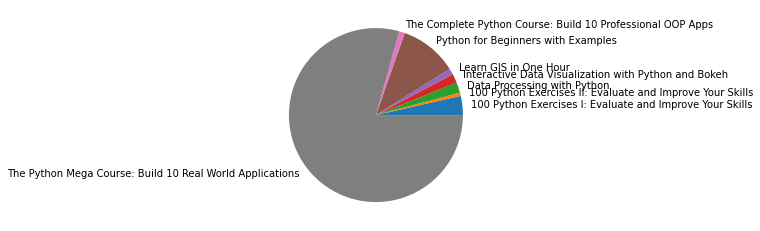

In [12]:
plt.pie(course_ratings, labels = course_ratings.index)